In [1]:
import pathlib

import numpy as np
import pandas as pd

In [2]:
BASE = pathlib.Path.cwd()
print(BASE)

/Users/sebastianberns/IGGI/Modules/4 Methods & Data 2/Project/ClashRoyaleML


In [3]:
df_train = pd.read_csv(BASE/'data_clean'/'processed_split_seed112_test.csv')
# df_train.columns.values

In [4]:
df_train.fillna(-1.0, inplace=True)
df_train.head()

,Unnamed: 0,Unnamed: 0.1,X,type,result,time,players.right.deck,players.right.trophy,players.right.clan,players.right.name,...,Sparky_R_lvl,Lava_Hound_L,Lava_Hound_R,Lava_Hound_L_lvl,Lava_Hound_R_lvl,num_cards_L,num_cards_R,avg_lvl_L,avg_lvl_R,level_discrepancy
0,25723,50771,50770,ladder,"['1', '3']",14.07.17,"[['Lava Hound', '3'], ['Zap', '12'], ['Firebal...",4452,FRIKIEMEX :V,Jokin,...,-1.0,0,1,-1.0,11.0,8,8,11.250,11.125,0.125
1,198571,377829,377828,ladder,"['1', '0']",16.07.17,"[['Golem', '7'], ['Elixir Collector', '10'], [...",5063,Syndikaatti,Moge,...,-1.0,0,0,-1.0,-1.0,8,8,12.750,12.250,0.500
2,69543,133263,133262,ladder,"['1', '0']",17.07.17,"[['Hog Rider', '11'], ['Tornado', '7'], ['Knig...",5012,Aesthetics crew,Nakata,...,-1.0,0,0,-1.0,-1.0,8,8,13.000,12.250,0.750
3,368769,690859,690858,ladder,"['2', '1']",31.07.17,"[['Minion Horde', '12'], ['The Log', '3'], ['F...",4845,冰与火之歌,冰与火之歌,...,-1.0,0,1,-1.0,11.0,8,8,11.125,11.375,-0.250
4,171410,327501,327500,ladder,"['0', '1']",14.07.17,"[['Hog Rider', '11'], ['Tornado', '7'], ['Prin...",5281,Silent,Moonlight ✨,...,-1.0,0,0,-1.0,-1.0,8,8,12.875,12.875,0.000


In [5]:
cols_labels = ['winner']
cols_features = ['trophy.discrepancy']

In [6]:
X = df_train[cols_features].to_numpy()

In [7]:
# Map target values
# 'left': 0
# 'right': 1
y = np.ravel(np.where( df_train[cols_labels] == 'left', 0, 1 ))

In [22]:
a = -0.09757535
b = 0.00427509

def z(x):
    return a*x + b

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

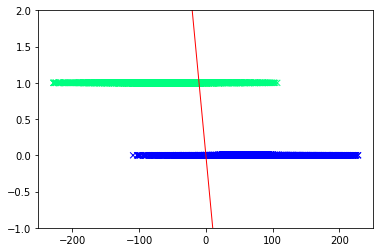

In [26]:
fig, ax = plt.subplots()
#ax.set_title(label)
ax.set_ylim(-1,+2)
ax.scatter(X, y, c=y, marker='x', cmap='winter', linewidth=1)
ax.plot([X.min(), X.max()], [z(X.min()), z(X.max())], c='r', linewidth=1)